In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dete

In [98]:
dete_survey = pd.read_csv('dete_survey.csv')

In [99]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [100]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [101]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## First Clean

#### Aboriginal Column

In [102]:
dete_survey['Aboriginal'].value_counts(dropna=False)

NaN    806
Yes     16
Name: Aboriginal, dtype: int64

In [103]:
dete_survey['Aboriginal'] = dete_survey['Aboriginal'].fillna('False')

In [104]:
dete_survey['Aboriginal'] = dete_survey['Aboriginal'].replace('Yes', True)

In [105]:
dete_survey['Aboriginal'].value_counts(dropna=False)

False    806
True      16
Name: Aboriginal, dtype: int64

Aboriginal column has been changed for a combo of NaN and Yes to a boolean

#### Classification Column

In [106]:
dete_survey['Classification'].value_counts(dropna=False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

Referring back to my objective, classification is almost more empty than recorded, and it was not enquired about by the people looking for analysis.   
Should be removed

In [107]:
dete_survey = dete_survey.drop('Classification', axis=1)

#### Position Column

In [108]:
dete_survey['Position'].value_counts(dropna=False)

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
NaN                                                          5
Business Service Manager                                     4
Deputy Principal                                       

In [109]:
dete_survey['Position'] = dete_survey['Position'].fillna('Teacher')

In [110]:
dete_survey['Position'].value_counts(dropna=False)

Teacher                                                    329
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
Business Service Manager                                     4
Deputy Principal                                             4
Name: Position, dtype: int64

Removing NaN values allows graphs to work better, and the 5 NaN values were statistically very likely to be teachers, and the low number of values means that it will distort the graph very little, with no loss from other rows

#### Employment Status

In [111]:
dete_survey['Employment Status'].value_counts(dropna=False)

Permanent Full-time    434
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
NaN                      5
Name: Employment Status, dtype: int64

In [112]:
dete_survey['Employment Status'] = dete_survey['Employment Status'].fillna('Permanent Full-time')

In [113]:
dete_survey['Employment Status'].value_counts(dropna=False)

Permanent Full-time    439
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
Name: Employment Status, dtype: int64

Set NaN data to the most common, permanent full-time

#### Business Column

In [114]:
dete_survey['Business Unit'].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Finance                                         1
Calliope State School                           1
Indigenous Education and Training Futures       1
Corporate Procurement                           1
Pacific Pines SHS                               1
Name: Business Unit, dtype: int64

In [115]:
dete_survey = dete_survey.drop(columns='Business Unit')

mostly empty and not relevant to the brief

#### Gender

In [116]:
dete_survey['Gender'].value_counts(dropna=False)

Female    573
Male      225
NaN        24
Name: Gender, dtype: int64

In [117]:
dete_survey['Gender'] = dete_survey['Gender'].fillna('Female')

In [118]:
dete_survey['Gender'].value_counts(dropna=False)

Female    597
Male      225
Name: Gender, dtype: int64

#### Age

In [119]:
dete_survey['Age'].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

In [120]:
dete_survey['Age'] = dete_survey['Age'].fillna('61 or older')

In [121]:
dete_survey['Age'].value_counts(dropna=False)

61 or older      233
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

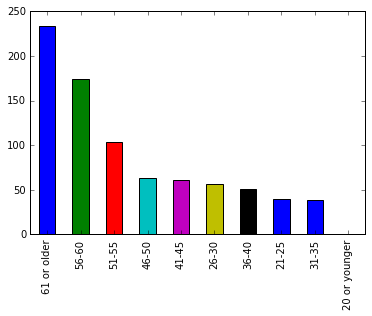

In [122]:
dete_survey['Age'].value_counts(dropna=False).plot(kind='bar')

### Torres Strait

In [123]:
dete_survey['Torres Strait'].value_counts(dropna=False)

NaN    819
Yes      3
Name: Torres Strait, dtype: int64

In [124]:
dete_survey = dete_survey.drop(columns='Torres Strait')

Three people is not enough to do a visual analysis on. If info is required, read the 3 files

#### South Sea

In [125]:
dete_survey['South Sea'].value_counts(dropna=False)

NaN    815
Yes      7
Name: South Sea, dtype: int64

In [126]:
dete_survey['South Sea'] = dete_survey['South Sea'].fillna(False)

In [127]:
dete_survey['South Sea'] = dete_survey['South Sea'].replace('Yes', True)

In [128]:
dete_survey['South Sea'].value_counts(dropna=False)

False    815
True       7
Name: South Sea, dtype: int64

#### Disability

In [129]:
dete_survey['Disability'].value_counts(dropna=False)

NaN    799
Yes     23
Name: Disability, dtype: int64

In [130]:
dete_survey['Disability'] = dete_survey['Disability'].fillna(False)

In [131]:
dete_survey['Disability'] = dete_survey['Disability'].replace('Yes', True)

In [132]:
dete_survey['Disability'].value_counts(dropna=False)

False    799
True      23
Name: Disability, dtype: int64

#### NESB

In [133]:
dete_survey['NESB'].value_counts(dropna=False)

NaN    790
Yes     32
Name: NESB, dtype: int64

In [134]:
dete_survey['NESB'] = dete_survey['NESB'].fillna(False)

In [135]:
dete_survey['NESB'] = dete_survey['NESB'].replace('Yes', True)

In [136]:
dete_survey['NESB'].value_counts(dropna=False)

False    790
True      32
Name: NESB, dtype: int64

#### ID

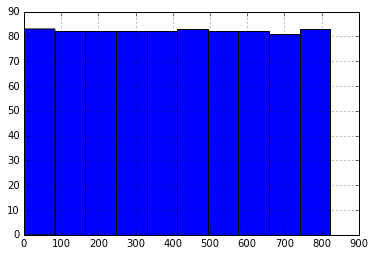

In [137]:
dete_survey['ID'].hist()

#### Seperation Type

In [138]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

#### Cease Date

In [139]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
07/2014         2
04/2013         2
04/2014         2
08/2012         2
09/2014         1
2010            1
07/2006         1
09/2010         1
11/2012         1
07/2012         1
2014            1
Name: Cease Date, dtype: int64

A lot more cleaning needs to be done here, but a quick one is to set the 'Not Stated' to 2012

In [140]:
dete_survey['Cease Date'] = dete_survey['Cease Date'].replace('Not Stated', '2012')

In [141]:
pattern = r"(2[0-9]{3})"

In [142]:
dates = dete_survey['Cease Date'].str.extract(pattern)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [143]:
dete_survey['Cease Date'] = dates

In [144]:
dete_survey['Cease Date'].value_counts()

2012    388
2013    380
2014     51
2010      2
2006      1
Name: Cease Date, dtype: int64

In [145]:
dete_survey['Cease Date'] = dete_survey['Cease Date'].astype('int')

#### DETE Start Date

In [146]:
dete_survey['DETE Start Date'].value_counts().sort_index()

1963           4
1965           1
1966           1
1967           2
1968           3
1969          10
1970          21
1971          10
1972          12
1973           8
1974          14
1975          21
1976          15
1977          11
1978          15
1979          14
1980          14
1981           9
1982           4
1983           9
1984          10
1985           8
1986          12
1987           7
1988          15
1989          17
1990          20
1991          18
1992          18
1993          13
1994          10
1995          14
1996          19
1997          14
1998          14
1999          19
2000          18
2001          10
2002          15
2003          15
2004          18
2005          20
2006          23
2007          34
2008          31
2009          24
2010          27
2011          40
2012          27
2013          21
Not Stated    73
Name: DETE Start Date, dtype: int64

In [147]:
dete_survey['DETE Start Date'] = dete_survey['DETE Start Date'].replace('Not Stated', np.NaN)

In [148]:
dete_survey['DETE Start Date'] = dete_survey['DETE Start Date'].astype('float')

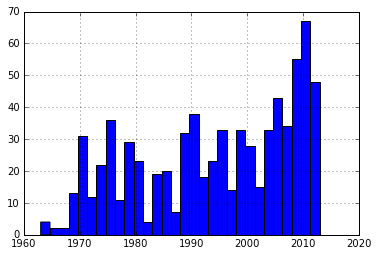

In [149]:
dete_survey['DETE Start Date'].hist(bins=30)

I can't drop 70 values into a particular year. More data to be analysed before I can estimate start date

#### Role Start Date

In [150]:
dete_survey['Role Start Date'].value_counts().sort_index()

1970           2
1971           1
1972           1
1973           1
1974           1
1975          12
1976           9
1977           2
1978           9
1979           7
1980           3
1981           5
1982           4
1983           5
1984           4
1985           6
1986          11
1987           5
1988          14
1989          18
1990          12
1991           8
1992          17
1993           9
1994           7
1995          13
1996          19
1997          13
1998          15
1999          19
200            1
2000          20
2001          15
2002          16
2003          20
2004          22
2005          20
2006          25
2007          41
2008          45
2009          38
2010          46
2011          57
2012          65
2013          41
Not Stated    98
Name: Role Start Date, dtype: int64

In [151]:
dete_survey['Role Start Date'] = dete_survey['Role Start Date'].replace('Not Stated', np.NaN)

In [152]:
dete_survey['Role Start Date'] = dete_survey['Role Start Date'].astype('float')

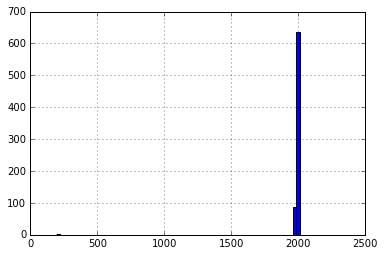

In [153]:
dete_survey['Role Start Date'].hist(bins=70)

Outlier at year 200

In [154]:
dete_survey[dete_survey['Role Start Date']==200]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Region,Employment Status,Career move to public sector,Career move to private sector,...,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,South Sea,Disability,NESB
390,391,Resignation-Other employer,2013,2000.0,200.0,Teacher,Central Queensland,Permanent Full-time,False,True,...,False,False,False,False,Female,46-50,False,False,False,False


In [155]:
dete_survey.loc[dete_survey['Role Start Date']==200, 'Role Start Date'] = 2000

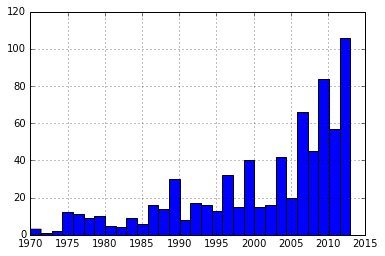

In [156]:
dete_survey['Role Start Date'].hist(bins=30)

I don't think Role Start Date is important in this analysis, since the department as a whole is looking at dissatisfaction.

In [157]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 32 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null int64
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               822 non-null object
Region                                 822 non-null object
Employment Status                      822 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security    

In [158]:
dete_survey.loc[dete_survey['DETE Start Date'].isnull(), 'Role Start Date'].value_counts(dropna=False)

NaN        69
 2011.0     2
 1997.0     1
 2003.0     1
Name: Role Start Date, dtype: int64

checking if any of the null DETE start dates have a numerical role start date, and copying it over

In [159]:
dete_survey.loc[dete_survey['DETE Start Date'].isnull(), 'DETE Start Date'] = dete_survey.loc[dete_survey['DETE Start Date'].isnull(), 'Role Start Date']

In [160]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 32 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null int64
DETE Start Date                        753 non-null float64
Role Start Date                        724 non-null float64
Position                               822 non-null object
Region                                 822 non-null object
Employment Status                      822 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security    

#### Institute Service

In [161]:
dete_survey['institute_service'] = dete_survey['Cease Date'] - dete_survey['DETE Start Date']

In [162]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 33 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null int64
DETE Start Date                        753 non-null float64
Role Start Date                        724 non-null float64
Position                               822 non-null object
Region                                 822 non-null object
Employment Status                      822 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security    

In [163]:
dete_survey = dete_survey.drop(columns='Role Start Date')

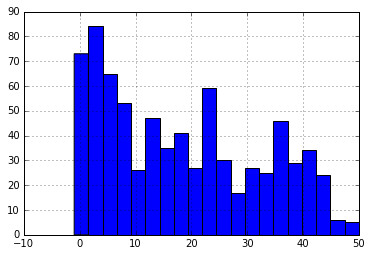

In [164]:
dete_survey['institute_service'].hist(bins=20)

I still can't replace the missing values with anything without distorting the graph, so I am going to drop any row with a null start date/institute service column

In [165]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 32 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null int64
DETE Start Date                        753 non-null float64
Position                               822 non-null object
Region                                 822 non-null object
Employment Status                      822 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security                   822 non-null bool
Work location              

In [166]:
dete_survey = dete_survey.dropna()

In [167]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 820
Data columns (total 32 columns):
ID                                     753 non-null int64
SeparationType                         753 non-null object
Cease Date                             753 non-null int64
DETE Start Date                        753 non-null float64
Position                               753 non-null object
Region                                 753 non-null object
Employment Status                      753 non-null object
Career move to public sector           753 non-null bool
Career move to private sector          753 non-null bool
Interpersonal conflicts                753 non-null bool
Job dissatisfaction                    753 non-null bool
Dissatisfaction with the department    753 non-null bool
Physical work environment              753 non-null bool
Lack of recognition                    753 non-null bool
Lack of job security                   753 non-null bool
Work location              

In [168]:
dete_survey.to_csv('dete_survey_first_clean.csv', index=False)

# TAFE

In [169]:
tafe_survey = pd.read_csv('tafe_survey.csv')

In [170]:
cols = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

In [171]:
tafe_survey.rename(columns=cols, inplace=True)

In [172]:
tafe_survey = tafe_survey.drop(columns = tafe_survey.columns[17:66])

In [173]:
tafe_survey = tafe_survey.drop(columns='LengthofServiceCurrent. Length of Service at current workplace (in years)')

In [174]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 22 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

## First Clean

#### Institute

In [175]:
tafe_survey['Institute'].value_counts()

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64

#### Work Area

In [176]:
tafe_survey['WorkArea'].value_counts(dropna=False)

Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64

#### Cease Date

In [177]:
tafe_survey['cease_date'].value_counts(dropna=False)

 2011.0    268
 2012.0    235
 2010.0    103
 2013.0     85
NaN          7
 2009.0      4
Name: cease_date, dtype: int64

In [178]:
tafe_survey['cease_date'] = tafe_survey['cease_date'].fillna(2011.0)

In [179]:
tafe_survey['cease_date'].value_counts(dropna=False)

2011.0    275
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64

#### Seperation Type

In [180]:
tafe_survey['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [181]:
tafe_survey['separationtype'] = tafe_survey['separationtype'].fillna('Resignation')

In [182]:
tafe_survey['separationtype'].value_counts(dropna=False)

Resignation                 341
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [183]:
cols = {'Contributing Factors. Career Move - Public Sector ' : 'Career move to public sector',
'Contributing Factors. Career Move - Private Sector ' : 'Career move to private sector',
'Contributing Factors. Career Move - Self-employment' : 'Career move to self employed',
'Contributing Factors. Ill Health' : 'Ill Health',
'Contributing Factors. Maternity/Family' : 'Maternity/family',                
'Contributing Factors. Dissatisfaction' : 'Dissatisfaction',         
'Contributing Factors. Job Dissatisfaction' : 'Job dissatisfaction',      
'Contributing Factors. Interpersonal Conflict' : 'Interpersonal conflicts',         
'Contributing Factors. Study' : 'Study',                        
'Contributing Factors. Travel' :  'Travel',                        
'Contributing Factors. Other' :  'Other',                         
'Contributing Factors. NONE' : 'None of the above'}
                          

In [184]:
tafe_survey.rename(columns=cols, inplace=True)

In [185]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 22 columns):
id                               702 non-null float64
Institute                        702 non-null object
WorkArea                         702 non-null object
cease_date                       702 non-null float64
separationtype                   702 non-null object
Career move to public sector     437 non-null object
Career move to private sector    437 non-null object
Career move to self employed     437 non-null object
Ill Health                       437 non-null object
Maternity/family                 437 non-null object
Dissatisfaction                  437 non-null object
Job dissatisfaction              437 non-null object
Interpersonal conflicts          437 non-null object
Study                            437 non-null object
Travel                           437 non-null object
Other                            437 non-null object
None of the above                437 non-null

In [186]:
tafe_survey['Career move to public sector'].value_counts(dropna=False)

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Career move to public sector, dtype: int64

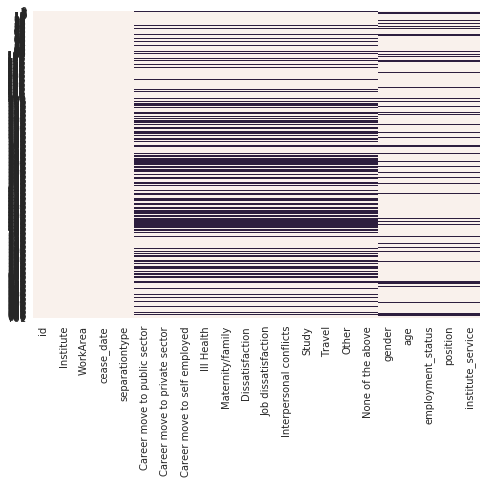

In [187]:
import seaborn as sns
sns.heatmap(tafe_survey.isnull(), cbar=False)

Since the surveys that are missing dissatisfaction data are missing the entire survey, I am going to remove them, as I believe some of them may have been dissatisfied and were not given the survey, and to mark them false would reduce the dissatisfaction rate artifically

In [188]:
tafe_survey = tafe_survey.loc[tafe_survey['Career move to public sector'].notnull()]

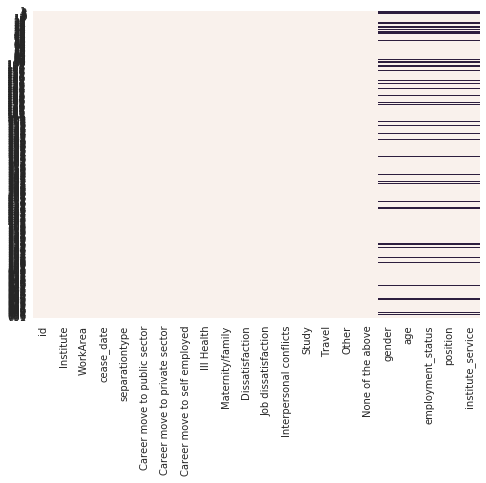

In [189]:
sns.heatmap(tafe_survey.isnull(), cbar=False)

In [190]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1 to 701
Data columns (total 22 columns):
id                               437 non-null float64
Institute                        437 non-null object
WorkArea                         437 non-null object
cease_date                       437 non-null float64
separationtype                   437 non-null object
Career move to public sector     437 non-null object
Career move to private sector    437 non-null object
Career move to self employed     437 non-null object
Ill Health                       437 non-null object
Maternity/family                 437 non-null object
Dissatisfaction                  437 non-null object
Job dissatisfaction              437 non-null object
Interpersonal conflicts          437 non-null object
Study                            437 non-null object
Travel                           437 non-null object
Other                            437 non-null object
None of the above                437 non-null

#### Gender

In [191]:
tafe_survey['gender'].value_counts(dropna=False)

Female    244
Male      136
NaN        57
Name: gender, dtype: int64

In [192]:
tafe_survey['gender']=tafe_survey['gender'].fillna('Female')

In [193]:
tafe_survey['gender'].value_counts(dropna=False)

Female    301
Male      136
Name: gender, dtype: int64

#### Age

In [194]:
tafe_survey['age'].value_counts(dropna=False)

56 or older      95
NaN              57
51-55            49
41  45           46
46  50           42
31  35           35
26  30           35
36  40           35
21  25           34
20 or younger     9
Name: age, dtype: int64

This analysis is actually adding more distortion than I would like. To drop from 437 to 380 is a loss of 13% of the original data but means there is no distortion for any group. That seems preferable.

In [195]:
tafe_survey = tafe_survey.dropna()

In [196]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 4 to 701
Data columns (total 22 columns):
id                               380 non-null float64
Institute                        380 non-null object
WorkArea                         380 non-null object
cease_date                       380 non-null float64
separationtype                   380 non-null object
Career move to public sector     380 non-null object
Career move to private sector    380 non-null object
Career move to self employed     380 non-null object
Ill Health                       380 non-null object
Maternity/family                 380 non-null object
Dissatisfaction                  380 non-null object
Job dissatisfaction              380 non-null object
Interpersonal conflicts          380 non-null object
Study                            380 non-null object
Travel                           380 non-null object
Other                            380 non-null object
None of the above                380 non-null

#### Age 

In [197]:
tafe_survey['age'].value_counts(dropna=False)

56 or older      95
51-55            49
41  45           46
46  50           42
31  35           35
26  30           35
36  40           35
21  25           34
20 or younger     9
Name: age, dtype: int64

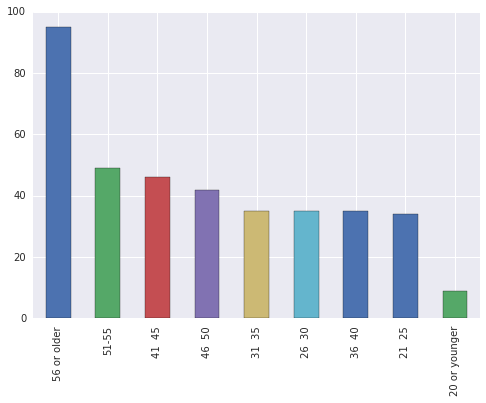

In [198]:
tafe_survey['age'].value_counts().plot(kind='bar')

#### Gender

In [199]:
tafe_survey['gender'].value_counts(dropna=False)

Female    244
Male      136
Name: gender, dtype: int64

#### Employment Status

In [200]:
tafe_survey['employment_status'].value_counts(dropna=False)

Permanent Full-time    158
Temporary Full-time    120
Permanent Part-time     44
Contract/casual         30
Temporary Part-time     28
Name: employment_status, dtype: int64

#### Position

In [201]:
tafe_survey['position'].value_counts(dropna=False)

Administration (AO)           188
Teacher (including LVT)       134
Professional Officer (PO)      21
Operational (OO)               16
Workplace Training Officer      6
Tutor                           5
Executive (SES/SO)              5
Technical Officer (TO)          5
Name: position, dtype: int64

#### Institute Service

In [202]:
tafe_survey['institute_service'].value_counts(dropna=False).sort_index()

1-2                   68
11-20                 49
3-4                   72
5-6                   36
7-10                  30
Less than 1 year      77
More than 20 years    48
Name: institute_service, dtype: int64

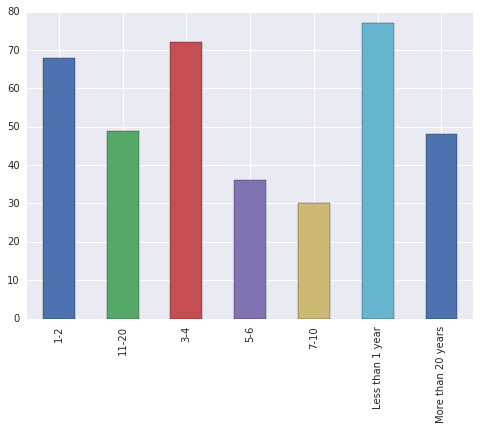

In [203]:
tafe_survey['institute_service'].value_counts(dropna=False).sort_index().plot(kind='bar')

#### Contributing Factors

In [204]:
tafe_survey['Career move to private sector'].value_counts(dropna=False)

-                               286
Career Move - Private Sector     94
Name: Career move to private sector, dtype: int64

In [205]:
def contributing_factors(val):
    if val == '-':
        return False
    else:
        return True

In [206]:
for i in range(5,17):
    tafe_survey.iloc[:,i] = tafe_survey.iloc[:,i].apply(contributing_factors)

In [207]:
tafe_survey.iloc[:,4:19].head()

,separationtype,Career move to public sector,Career move to private sector,Career move to self employed,Ill Health,Maternity/family,Dissatisfaction,Job dissatisfaction,Interpersonal conflicts,Study,Travel,Other,None of the above,gender,age
4,Resignation,False,True,False,False,False,False,False,False,False,False,False,False,Male,41 45
5,Resignation,False,False,False,False,False,False,False,False,False,False,True,False,Female,56 or older
6,Resignation,False,True,False,False,True,False,False,False,False,False,True,False,Male,20 or younger
7,Resignation,False,False,False,False,False,False,False,False,False,False,True,False,Male,46 50
8,Resignation,False,False,False,False,False,False,False,False,False,False,True,False,Female,36 40


In [208]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 4 to 701
Data columns (total 22 columns):
id                               380 non-null float64
Institute                        380 non-null object
WorkArea                         380 non-null object
cease_date                       380 non-null float64
separationtype                   380 non-null object
Career move to public sector     380 non-null bool
Career move to private sector    380 non-null bool
Career move to self employed     380 non-null bool
Ill Health                       380 non-null bool
Maternity/family                 380 non-null bool
Dissatisfaction                  380 non-null bool
Job dissatisfaction              380 non-null bool
Interpersonal conflicts          380 non-null bool
Study                            380 non-null bool
Travel                           380 non-null bool
Other                            380 non-null bool
None of the above                380 non-null bool
gender          

In [209]:
tafe_survey.to_csv('tafe_survey_first_clean.csv', index=False)

# Second Clean

In [210]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 820
Data columns (total 32 columns):
ID                                     753 non-null int64
SeparationType                         753 non-null object
Cease Date                             753 non-null int64
DETE Start Date                        753 non-null float64
Position                               753 non-null object
Region                                 753 non-null object
Employment Status                      753 non-null object
Career move to public sector           753 non-null bool
Career move to private sector          753 non-null bool
Interpersonal conflicts                753 non-null bool
Job dissatisfaction                    753 non-null bool
Dissatisfaction with the department    753 non-null bool
Physical work environment              753 non-null bool
Lack of recognition                    753 non-null bool
Lack of job security                   753 non-null bool
Work location              

In [211]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 4 to 701
Data columns (total 22 columns):
id                               380 non-null float64
Institute                        380 non-null object
WorkArea                         380 non-null object
cease_date                       380 non-null float64
separationtype                   380 non-null object
Career move to public sector     380 non-null bool
Career move to private sector    380 non-null bool
Career move to self employed     380 non-null bool
Ill Health                       380 non-null bool
Maternity/family                 380 non-null bool
Dissatisfaction                  380 non-null bool
Job dissatisfaction              380 non-null bool
Interpersonal conflicts          380 non-null bool
Study                            380 non-null bool
Travel                           380 non-null bool
Other                            380 non-null bool
None of the above                380 non-null bool
gender          

## Column Renaming

In [212]:
dete_survey.columns = (dete_survey.columns
                       .str.strip()
                       .str.lower()
                       .str.replace(' ','_'))

In [213]:
tafe_survey.columns = (tafe_survey.columns
                       .str.strip()
                       .str.lower()
                       .str.replace(' ','_'))

## Category Equivalents

### Study/Travel

In [214]:
tafe_survey['study/travel'] = tafe_survey['travel'] | tafe_survey['study']
    


In [215]:
tafe_survey['study/travel'].value_counts()

False    349
True      31
Name: study/travel, dtype: int64

In [216]:
tafe_survey['study'].value_counts()

False    364
True      16
Name: study, dtype: int64

In [217]:
tafe_survey = tafe_survey.drop(columns=['study','travel'])

### Dissatisfaction

In [218]:
tafe_survey['dissatisfaction'].value_counts()

False    327
True      53
Name: dissatisfaction, dtype: int64

In [219]:
tafe_survey['dissatisfaction'] = (tafe_survey['dissatisfaction'] | tafe_survey['job_dissatisfaction']) | (tafe_survey['interpersonal_conflicts'])

In [220]:
tafe_survey['dissatisfaction'].value_counts()

False    274
True     106
Name: dissatisfaction, dtype: int64

In [221]:
tafe_survey = tafe_survey.drop(columns=['job_dissatisfaction', 'interpersonal_conflicts'])

In [222]:
dete_survey['dissatisfaction'] = (dete_survey['job_dissatisfaction'] |
                    dete_survey['dissatisfaction_with_the_department'] |
                    dete_survey['physical_work_environment'] |
                    dete_survey['lack_of_recognition'] |
                    dete_survey['lack_of_job_security'] |
                    dete_survey['work_location'] |
                    dete_survey['employment_conditions'] |
                    dete_survey['work_life_balance'] |
                    dete_survey['workload'])

In [223]:
dete_survey['dissatisfaction'].value_counts()

False    396
True     357
Name: dissatisfaction, dtype: int64

In [224]:
dete_survey = (dete_survey.drop(columns=['job_dissatisfaction',
                    'dissatisfaction_with_the_department',
                    'physical_work_environment',
                    'lack_of_recognition',
                    'lack_of_job_security',
                    'work_location',
                    'employment_conditions',
                    'work_life_balance',
                    'workload']))

### Seperation Type

In [225]:
tafe_survey.rename(columns={'separationtype':'separation_type'}, inplace=True)

In [226]:
dete_survey.rename(columns={'separationtype':'separation_type'}, inplace=True)

In [227]:
tafe_survey['cease_date'] = tafe_survey['cease_date'].astype(int)

In [228]:
dete_survey['separation_type'].value_counts()

Age Retirement                          264
Resignation-Other reasons               138
Resignation-Other employer               83
Voluntary Early Retirement (VER)         65
Resignation-Move overseas/interstate     63
Ill Health Retirement                    50
Other                                    43
Contract Expired                         33
Termination                              14
Name: separation_type, dtype: int64

In [229]:
tafe_survey['separation_type'].value_counts()

Resignation    290
Retirement      70
Transfer        20
Name: separation_type, dtype: int64

In [230]:
cols = ['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate']

In [231]:
resign_bool = dete_survey['separation_type'].isin(cols)

In [232]:
dete_survey.loc[resign_bool, 'separation_type'] = 'Resignation'

In [233]:
cols = (['Age Retirement','Voluntary Early Retirement (VER)', 
         'Ill Health Retirement'])

In [234]:
retire_bool = dete_survey['separation_type'].isin(cols)

In [235]:
dete_survey.loc[retire_bool, 'separation_type'] = 'Retirement'

In [236]:
dete_survey['separation_type'].value_counts()

Retirement          379
Resignation         284
Other                43
Contract Expired     33
Termination          14
Name: separation_type, dtype: int64

### Age

In [237]:
tafe_survey['age'].value_counts().sort_index()

20 or younger     9
21  25           34
26  30           35
31  35           35
36  40           35
41  45           46
46  50           42
51-55            49
56 or older      95
Name: age, dtype: int64

In [238]:
dete_survey['age'].value_counts().sort_index()

20 or younger      1
21-25             38
26-30             52
31-35             38
36-40             48
41-45             60
46-50             57
51-55             98
56-60            152
61 or older      209
Name: age, dtype: int64

In [239]:
mappings = ({'46  50' : '46-50', '41  45' : '41-45', 
             '36  40' : '36-40', '31  35' : '31-35',
             '26  30' : '26-30', '21  25' : '21-25',
            '20 or younger' : '20 or younger', '51-55' : '51-55',
            '56 or older' : '56-60'})

In [240]:
tafe_survey['age'] = tafe_survey['age'].map(mappings, na_action='ignore')

In [241]:
tafe_survey['age'].value_counts().sort_index()

20 or younger     9
21-25            34
26-30            35
31-35            35
36-40            35
41-45            46
46-50            42
51-55            49
56-60            95
Name: age, dtype: int64

In [242]:
dete_survey['age'].value_counts().sort_index()

20 or younger      1
21-25             38
26-30             52
31-35             38
36-40             48
41-45             60
46-50             57
51-55             98
56-60            152
61 or older      209
Name: age, dtype: int64

### Institute Service

According to https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage, service time will be catagorized in 4 areas:  
New < 3 years  
Experienced < 6 years  
Established < 10 years  
Veteran > 11 years

In [243]:
dete_survey['institute_service'] = dete_survey['institute_service'].astype(int)

In [247]:
dete_survey.loc[(dete_survey['institute_service'] == -1), 
                 'institute_service'] = 0

In [248]:
dete_survey['institute_service'].value_counts().sort_index()

0     34
1     39
2     25
3     31
4     28
5     35
6     30
7     18
8     14
9     21
10    13
11    13
12    15
13    18
14    14
15    19
16    16
17    17
18    11
19    13
20    12
21    15
22    25
23    17
24    17
25    11
26    11
27     8
28     9
29     8
30     4
31    11
32    12
33    11
34    14
35    15
36     8
37    23
38    15
39    14
40     9
41    11
42    14
43    17
44     7
45     5
46     1
48     1
49     3
50     1
Name: institute_service, dtype: int64

In [249]:
tafe_survey['institute_service'].value_counts().sort_index()

1-2                   68
11-20                 49
3-4                   72
5-6                   36
7-10                  30
Less than 1 year      77
More than 20 years    48
Name: institute_service, dtype: int64

In [250]:
pattern = r'([0-9]?[0-9])'

In [251]:
tafe_survey['institute_service'] = (tafe_survey['institute_service']
                                    .str.extract(pattern))

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [252]:
tafe_survey['institute_service'].value_counts().sort_index()

1     145
11     49
20     48
3      72
5      36
7      30
Name: institute_service, dtype: int64

In [253]:
def age_cat(val):
    if val >=11:
        return 'Veteran'
    elif val >= 7:
        return 'Established'
    elif val >= 3:
        return 'Experienced'
    else:
        return 'New'

In [254]:
tafe_survey['institute_service'] = tafe_survey['institute_service'].astype(int)

In [255]:
tafe_survey['institute_service'] = tafe_survey['institute_service'].apply(age_cat)

In [256]:
tafe_survey['institute_service'].value_counts()

New            145
Experienced    108
Veteran         97
Established     30
Name: institute_service, dtype: int64

In [257]:
dete_survey['institute_service'] = dete_survey['institute_service'].apply(age_cat)

In [258]:
dete_survey['institute_service'].value_counts()

Veteran        465
Experienced    124
New             98
Established     66
Name: institute_service, dtype: int64

### Employment Status

In [271]:
dete_survey['employment_status'].value_counts()

Permanent Full-time    408
Permanent Part-time    275
Temporary Full-time     40
Temporary Part-time     20
Casual                  10
Name: employment_status, dtype: int64

In [274]:
tafe_survey['employment_status'].value_counts()

Permanent Full-time    158
Temporary Full-time    120
Permanent Part-time     44
Contract/casual         30
Temporary Part-time     28
Name: employment_status, dtype: int64

In [279]:
tafe_survey.loc[tafe_survey['employment_status'] == 'Contract/casual', 'employment_status'] = 'Casual'

In [280]:
tafe_survey['employment_status'].value_counts()

Permanent Full-time    158
Temporary Full-time    120
Permanent Part-time     44
Casual                  30
Temporary Part-time     28
Name: employment_status, dtype: int64

# Combination

In [259]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 820
Data columns (total 24 columns):
id                               753 non-null int64
separation_type                  753 non-null object
cease_date                       753 non-null int64
dete_start_date                  753 non-null float64
position                         753 non-null object
region                           753 non-null object
employment_status                753 non-null object
career_move_to_public_sector     753 non-null bool
career_move_to_private_sector    753 non-null bool
interpersonal_conflicts          753 non-null bool
maternity/family                 753 non-null bool
relocation                       753 non-null bool
study/travel                     753 non-null bool
ill_health                       753 non-null bool
traumatic_incident               753 non-null bool
none_of_the_above                753 non-null bool
gender                           753 non-null object
age          

In [266]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 4 to 701
Data columns (total 19 columns):
id                               380 non-null float64
institute                        380 non-null object
workarea                         380 non-null object
cease_date                       380 non-null int64
separation_type                  380 non-null object
career_move_to_public_sector     380 non-null bool
career_move_to_private_sector    380 non-null bool
career_move_to_self_employed     380 non-null bool
ill_health                       380 non-null bool
maternity/family                 380 non-null bool
dissatisfaction                  380 non-null bool
other                            380 non-null bool
none_of_the_above                380 non-null bool
gender                           380 non-null object
age                              380 non-null object
employment_status                380 non-null object
position                         380 non-null object
institute_

In [281]:
dete_survey['institute'] = 'DETE'

In [282]:
tafe_survey['institute'] = 'TAFE'

In [283]:
tafe_survey.to_csv('tafe_survey_second_clean.csv', index=False)

In [284]:
dete_survey.to_csv('dete_survey_second_clean.csv', index=False)

In [291]:
combined = pd.concat([dete_survey, tafe_survey])

In [292]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 701
Data columns (total 28 columns):
aboriginal                       753 non-null object
age                              1133 non-null object
career_move_to_private_sector    1133 non-null bool
career_move_to_public_sector     1133 non-null bool
career_move_to_self_employed     380 non-null object
cease_date                       1133 non-null int64
dete_start_date                  753 non-null float64
disability                       753 non-null object
dissatisfaction                  1133 non-null bool
employment_status                1133 non-null object
gender                           1133 non-null object
id                               1133 non-null float64
ill_health                       1133 non-null bool
institute                        1133 non-null object
institute_service                1133 non-null object
interpersonal_conflicts          753 non-null object
maternity/family                 1133 non-

### Combined Cleaning

In [297]:
combined = combined.dropna(axis='columns')

In [298]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 701
Data columns (total 16 columns):
age                              1133 non-null object
career_move_to_private_sector    1133 non-null bool
career_move_to_public_sector     1133 non-null bool
cease_date                       1133 non-null int64
dissatisfaction                  1133 non-null bool
employment_status                1133 non-null object
gender                           1133 non-null object
id                               1133 non-null float64
ill_health                       1133 non-null bool
institute                        1133 non-null object
institute_service                1133 non-null object
maternity/family                 1133 non-null bool
none_of_the_above                1133 non-null bool
position                         1133 non-null object
separation_type                  1133 non-null object
study/travel                     1133 non-null bool
dtypes: bool(7), float64(1), int64(1), objec

In [299]:
combined.to_csv('combined_data.csv', index=False)